In [1]:
%matplotlib notebook
%matplotlib notebook

import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
from scipy import signal
import glob
import re
import pandas as pd
from sklearn.preprocessing import scale
from sklearn import decomposition

In [4]:
def filter_data(sensordata, fs=200, fc=5):
    sensordata_filt = np.zeros(sensordata.shape)
    
    w = fc / (fs / 2)
    b, a = signal.butter(fc,w, 'low')
    
    sensordata_filt[:,0] = signal.filtfilt(b,a, sensordata[:,0])
    sensordata_filt[:,1] = signal.filtfilt(b,a, sensordata[:,1])
    sensordata_filt[:,2] = signal.filtfilt(b,a, sensordata[:,2])
    
    return sensordata_filt

In [94]:
paths =glob.glob(r'./Data/Smartphone3/*')
# print(paths)

<IPython.core.display.Javascript object>


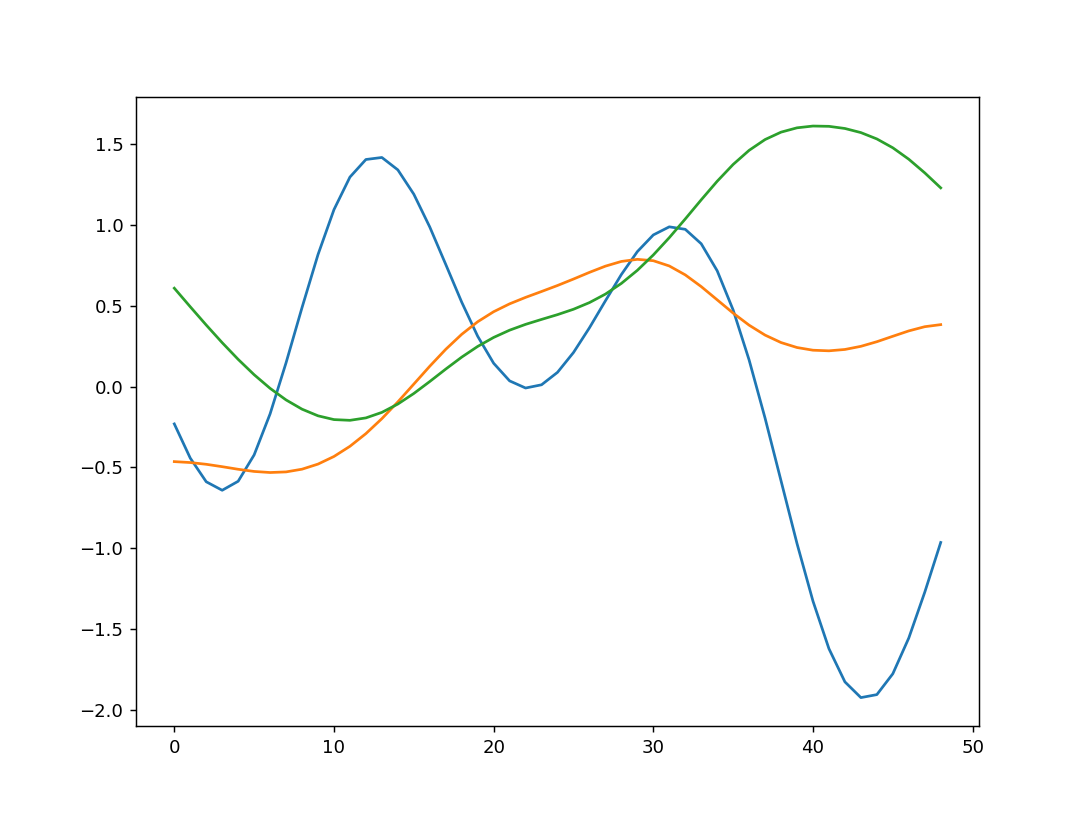

In [147]:
for path in paths:
    name = re.split('/',path)
    experiment_name = name[-1]
    splitexp = re.split('_',experiment_name)
    subj=splitexp[0]
    gait=splitexp[1]
    if not re.search(r'red', gait) and (re.search(r'215',subj) or re.search(r'216',subj) or re.search(r'217',subj)) and re.search(r'downstairs01', gait):
        # re.search(r'215',subj) or re.search(r'217',subj)
        gyr_file = glob.glob(path+'/Gyroscope.csv')
        acc_file = glob.glob(path+'/Accelerometer.csv')
        data_gyr = np.loadtxt(gyr_file[0], delimiter=',', skiprows=1)
        gyr = data_gyr[:,1:4]
        time_gyr = data_gyr[:,0]
        data_acc = np.loadtxt(acc_file[0], delimiter=',', skiprows=1)
        acc = data_acc[:,1:4]
        time_acc = data_acc[:,0]
        samp_freq_gyr = np.round(len(time_gyr)/(time_gyr[-1]))
        sampling_frequency_gyr = np.round(len(time_gyr)/(time_gyr[-1]))
        samp_freq_acc = np.round(len(time_acc)/(time_acc[-1]))
        sampling_frequency_acc = np.round(len(time_acc)/(time_acc[-1]))
        # print('Duration of Acc_exp:', time_acc[-1], 'Duration of Gyr_exp:', time_gyr[-1])
        filter_acc =filter_data(acc,fs=sampling_frequency_acc,fc=2)
        filter_gyr = filter_data(gyr, fs=sampling_frequency_gyr, fc=4)
        acc_cut, gyr_cut = cut_data(filter_acc,filter_gyr,samp_freq_acc)
        data_gyr = scale(gyr_cut)
        pca_gyr = decomposition.PCA(n_components=1)
        pca_gyr.fit(data_gyr)
        trans_gyr = pca_gyr.transform(data_gyr)
        trans_df_gyr = pd.DataFrame(trans_gyr)
        data_acc = scale(acc_cut)
        pca_acc = decomposition.PCA(n_components=1)
        pca_acc.fit(data_acc)
        trans_acc = pca_acc.transform(data_acc)
        trans_df_acc = pd.DataFrame(trans_acc)
        res_acc = signal.resample(trans_df_acc[0],int(time_acc[-1]))
        res_gyr = signal.resample(trans_df_gyr[0],int(time_gyr[-1]))
        plt.plot(filter_gyr[1:50,[1]])
#         plt.plot(res_acc)
#         plt.plot(res_gyr)
        plt.show()

<IPython.core.display.Javascript object>


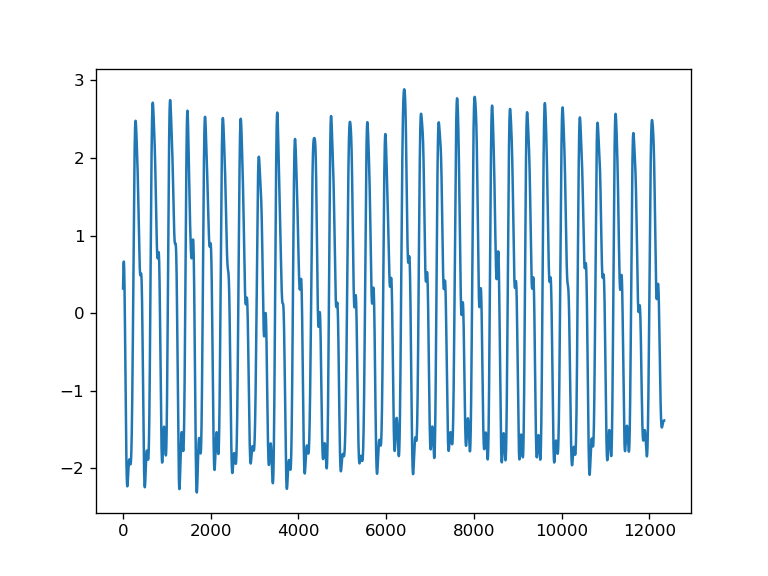

In [59]:
# plt.plot(filter_gyr[:,[0]]) #x
# plt.plot(filter_gyr[:,[1]]) #y
# plt.plot(filter_gyr[:,[2]]) #z
plt.plot(trans_df)
plt.show()

In [19]:
filter_acc =filter_data(acc,fs=sampling_frequency,fc=4)
filter_gyr = filter_data(gyr, fs=sampling_frequency, fc=4)

In [34]:
# plt.plot(gyr[:,0])
# plt.plot(filter_gyr[:,0])
# plt.show()

In [75]:
def cut_data(acc_filt, gyr_filt, freq):
    acc_abs = np.linalg.norm(acc_filt,axis=1)
    

    peaks, _ = signal.find_peaks(acc_abs,height=11, distance=freq/2)
    diff_peaks =np.diff(peaks)
    gap1  = np.argmax(diff_peaks[:20])
    gap2  = np.argmax(diff_peaks[-10:])
    gap2  = int(gap2 + np.shape(diff_peaks)-10)

    
    acc_cut = acc_filt[peaks[gap1+1]:peaks[gap2],:]
    gyr_cut = gyr_filt[peaks[gap1+1]:peaks[gap2],:]
    
    return acc_cut, gyr_cut

In [22]:
acc_cut, gyr_cut = cut_data(filter_acc,filter_gyr,sampling_frequency)

In [13]:
plt.plot(gyr_cut[:,1])
plt.plot(filter_acc[:,1])
# plt.plot(abs_acc)
plt.show()

In [25]:
data = scale(filter_gyr)
# print(data)

pca = decomposition.PCA(n_components=1)
pca.fit(data)
trans = pca.transform(data)

trans_df = pd.DataFrame(trans)
print(trans_df)

plt.plot(trans_df)
plt.show()

             0
0    -0.264019
1    -0.056475
2     0.113706
3     0.216567
4     0.233676
...        ...
1755 -0.423103
1756 -0.673521
1757 -0.929559
1758 -1.188185
1759 -1.446649

[1760 rows x 1 columns]
